<a href="https://colab.research.google.com/github/SbgVit0r/Projeto-ML/blob/main/Projeto_2_Completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2 - Machine Learning

## Grupo:

>João Marcelo Santiago Batista Souza

>João Vitor Souza de Morais

>Leonardo Mockaites

>Vitor Sbeghi

---

In [222]:
# Importando as bibliotecas necessárias

# Tratamento dos dados
import numpy as np
import pandas as pd

# Modelos de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Metricas usadas para métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

## Recebendo os dados


In [223]:
data_google_id = '1DbE1wrGt-ZvHoeC_QKQpTHOr-pEBPajr'
gdd.download_file_from_google_drive(file_id = data_google_id, dest_path = './dados.csv', showsize=True)
dados = pd.read_csv("dados.csv", sep=',')

## Análise Exploratória dos Dados

In [224]:
dados.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1.0,spring,0.0,1.0,No,6,No,2.0,14.110847,18.18125,80.5833,10.749882,985.0
1,2.0,spring,0.0,1.0,No,0,No,2.0,14.902598,17.68695,69.6087,16.652113,801.0
2,3.0,spring,0.0,1.0,No,1,NaN,1.0,8.050924,9.47025,43.7273,16.636703,1349.0
3,4.0,spring,0.0,1.0,No,2,Yes,1.0,8.200000,10.60610,59.0435,10.739832,1562.0
4,5.0,spring,0.0,1.0,No,3,Yes,1.0,9.305237,11.46350,43.6957,12.522300,1600.0


In [225]:
# Iremos remover a coluna instant pois ela não é necessária para a análise e não fara diferença nos estudos
dados.drop(columns=['instant'], inplace=True)

In [226]:
dados.shape

(730, 12)

In [227]:
# Alteração feita nos nomes das colunas para melhor compreensão dos dados
dados.columns = ['estacao', 'ano', 'mes', 'feriado', 'diasemana', 'diatrabalho', 'clima', 'temperatura', 'stermica', 'umidade', 'velocidadevento', 'totalalugadas']
dados.head()

,estacao,ano,mes,feriado,diasemana,diatrabalho,clima,temperatura,stermica,umidade,velocidadevento,totalalugadas
0,spring,0.0,1.0,No,6,No,2.0,14.110847,18.18125,80.5833,10.749882,985.0
1,spring,0.0,1.0,No,0,No,2.0,14.902598,17.68695,69.6087,16.652113,801.0
2,spring,0.0,1.0,No,1,NaN,1.0,8.050924,9.47025,43.7273,16.636703,1349.0
3,spring,0.0,1.0,No,2,Yes,1.0,8.200000,10.60610,59.0435,10.739832,1562.0
4,spring,0.0,1.0,No,3,Yes,1.0,9.305237,11.46350,43.6957,12.522300,1600.0


In [228]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   estacao          728 non-null    object 
 1   ano              729 non-null    float64
 2   mes              729 non-null    float64
 3   feriado          728 non-null    object 
 4   diasemana        730 non-null    int64  
 5   diatrabalho      726 non-null    object 
 6   clima            726 non-null    float64
 7   temperatura      729 non-null    float64
 8   stermica         728 non-null    float64
 9   umidade          728 non-null    float64
 10  velocidadevento  728 non-null    float64
 11  totalalugadas    727 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 68.6+ KB


In [229]:
# Fazendo a alteração do tipo do total de bicicletas alugadas de float para int
dados['totalalugadas'] = dados['totalalugadas'].astype('int64', errors = 'ignore')

In [230]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   estacao          728 non-null    object 
 1   ano              729 non-null    float64
 2   mes              729 non-null    float64
 3   feriado          728 non-null    object 
 4   diasemana        730 non-null    int64  
 5   diatrabalho      726 non-null    object 
 6   clima            726 non-null    float64
 7   temperatura      729 non-null    float64
 8   stermica         728 non-null    float64
 9   umidade          728 non-null    float64
 10  velocidadevento  728 non-null    float64
 11  totalalugadas    727 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 68.6+ KB


In [231]:
dados.describe()

,ano,mes,diasemana,clima,temperatura,stermica,umidade,velocidadevento,totalalugadas
count,729.000000,729.000000,730.000000,726.000000,729.000000,728.000000,728.000000,728.000000,727.000000
mean,0.499314,6.524005,2.997260,1.396694,20.307341,23.715580,62.781185,12.764629,4510.555708
std,0.500343,3.452151,2.006161,0.545517,7.504969,8.158760,14.246235,5.201482,1933.903747
min,0.000000,1.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,1.000000,1.000000,13.803347,16.881400,52.000000,9.031466,3176.500000
50%,0.000000,7.000000,3.000000,1.000000,20.431653,24.257900,62.625000,12.125325,4549.000000
75%,1.000000,10.000000,5.000000,2.000000,26.855000,30.477187,73.010425,15.636209,5956.000000
max,1.000000,12.000000,6.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


array([[<Axes: title={'center': 'ano'}>, <Axes: title={'center': 'mes'}>,
        <Axes: title={'center': 'diasemana'}>],
       [<Axes: title={'center': 'clima'}>,
        <Axes: title={'center': 'temperatura'}>,
        <Axes: title={'center': 'stermica'}>],
       [<Axes: title={'center': 'umidade'}>,
        <Axes: title={'center': 'velocidadevento'}>,
        <Axes: title={'center': 'totalalugadas'}>]], dtype=object)

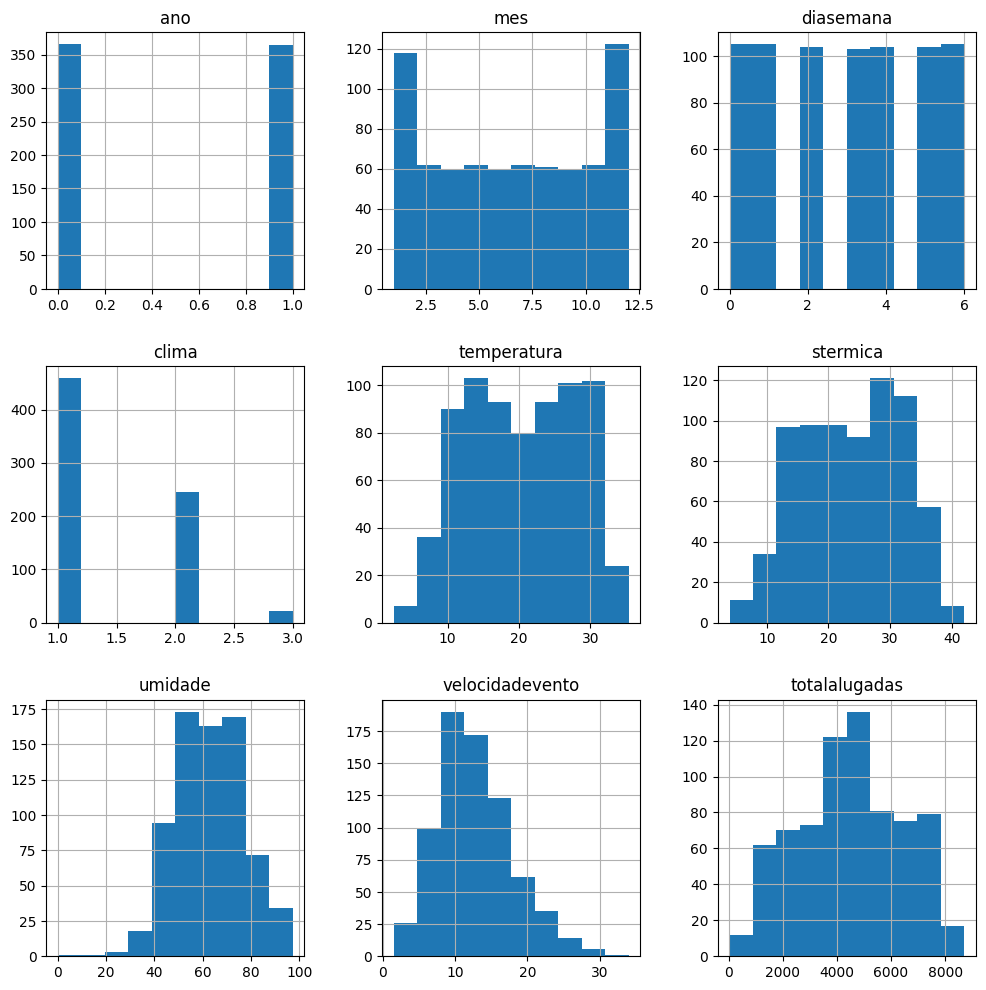

In [232]:
dados.hist(figsize=(12,12))
# Como se pode observar as colunas não estão em uma distribuição normal, então será necessário aplicar a normalização

## BoxPlots e Tratamento de Outliers



<Axes: >

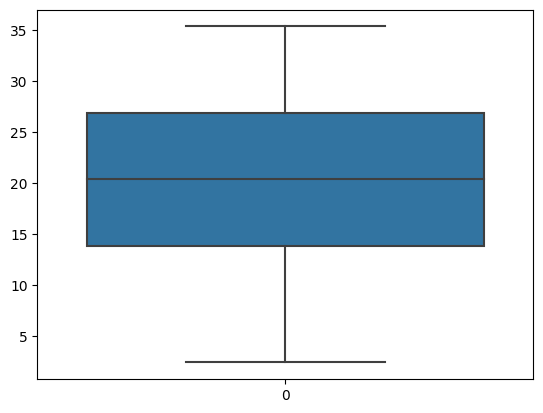

In [233]:
sns.boxplot(dados['temperatura'])

<Axes: >

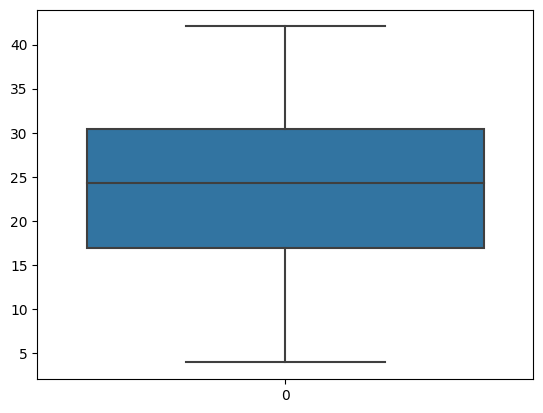

In [234]:
sns.boxplot(dados['stermica'])

<Axes: >

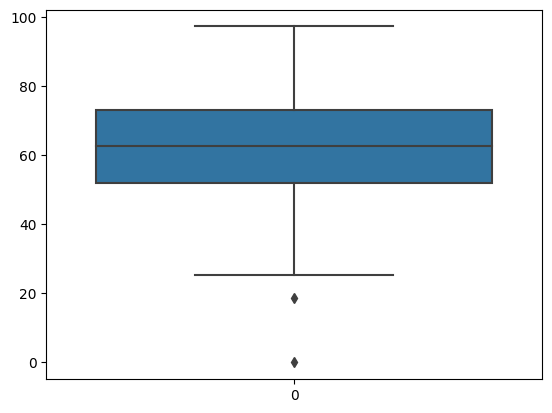

In [235]:
sns.boxplot(dados['umidade'])

In [236]:
quartis = np.quantile(dados['umidade'], [0.25, 0.75])
limite_inferior = quartis[0]  -1.5*(quartis[1]-quartis[0])
limite_superior = quartis[1]  +1.5*(quartis[1]-quartis[0])
mediana = dados['umidade'].median()
mask = (dados['umidade'] < limite_inferior) | (dados['umidade'] > limite_superior)
print(f"A coluna {'umidade'} possui {mask.sum()} outliers para serem tratados")
dados.loc[mask,'umidade'] = mediana

A coluna umidade possui 0 outliers para serem tratados


<Axes: >

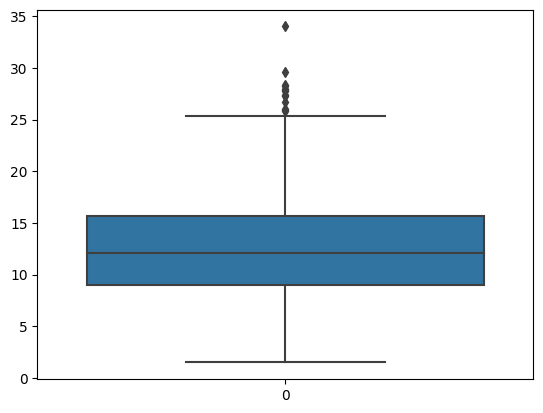

In [237]:
sns.boxplot(dados['velocidadevento'])

In [238]:
quartis = np.quantile(dados['velocidadevento'], [0.25, 0.75])
limite_inferior = quartis[0]  -1.5*(quartis[1]-quartis[0])
limite_superior = quartis[1]  +1.5*(quartis[1]-quartis[0])
mediana = dados['velocidadevento'].median()
mask = (dados['velocidadevento'] < limite_inferior) | (dados['velocidadevento'] > limite_superior)
print(f"A coluna {'velocidadevento'} possui {mask.sum()} outliers para serem tratados")
dados.loc[mask,'velocidadevento'] = mediana

A coluna velocidadevento possui 0 outliers para serem tratados


<Axes: >

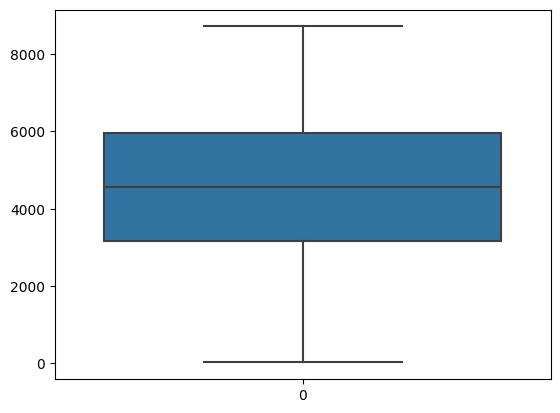

In [239]:
sns.boxplot(dados['totalalugadas'])

## Tratando os valores nulos

In [240]:
dados.isnull().sum()

estacao            2
ano                1
mes                1
feriado            2
diasemana          0
diatrabalho        4
clima              4
temperatura        1
stermica           2
umidade            2
velocidadevento    2
totalalugadas      3
dtype: int64

### Checando os valores de menor ocorrência

In [241]:
dados['ano'].value_counts()

0.0    365
1.0    364
Name: ano, dtype: int64

In [242]:
dados['feriado'].value_counts()

No     707
Yes     21
Name: feriado, dtype: int64

In [243]:
dados['diatrabalho'].value_counts()

Yes    497
No     229
Name: diatrabalho, dtype: int64

In [244]:
dados['clima'].value_counts()

1.0    459
2.0    246
3.0     21
Name: clima, dtype: int64

### Substituição dos Valores Nulos

In [245]:
# Substituindo os valores nulos pela mediana
colunasME = ['temperatura', 'stermica', 'umidade',
'velocidadevento', 'totalalugadas']
colunasME = list(colunasME)

for col in colunasME:
  mediana = dados[col].median()

  dados[col].fillna(mediana, inplace=True)

# Substituindo os valores nulos pela moda (O método for não funcionou e só esse deu certo)
mask = dados['feriado'].isnull()
mask2 = dados['diatrabalho'].isnull()
mask3 = dados['ano'].isnull()
mask4 = dados['clima'].isnull()
dados.loc[mask,'feriado'] = 'No'
dados.loc[mask2, 'diatrabalho'] = 'Yes'
dados.loc[mask3, 'ano'] = 1.0
dados.loc[mask4, 'clima'] = 1.0


#### Substituindo os valores nulos da coluna estação

In [246]:
maskE = dados['estacao'].isnull()
dados[maskE]

,estacao,ano,mes,feriado,diasemana,diatrabalho,clima,temperatura,stermica,umidade,velocidadevento,totalalugadas
29,NaN,0.0,1.0,No,0,No,1.0,8.877402,12.51610,72.2174,4.956834,1096.0
296,NaN,0.0,10.0,No,1,Yes,1.0,18.996653,22.85335,77.2083,7.959064,4187.0


In [247]:
maskA = (dados['ano'] == 0.0) & (dados['mes'] == 1.0)
dados[maskA].head()

,estacao,ano,mes,feriado,diasemana,diatrabalho,clima,temperatura,stermica,umidade,velocidadevento,totalalugadas
0,spring,0.0,1.0,No,6,No,2.0,14.110847,18.18125,80.5833,10.749882,985.0
1,spring,0.0,1.0,No,0,No,2.0,14.902598,17.68695,69.6087,16.652113,801.0
2,spring,0.0,1.0,No,1,Yes,1.0,8.050924,9.47025,43.7273,16.636703,1349.0
3,spring,0.0,1.0,No,2,Yes,1.0,8.200000,10.60610,59.0435,10.739832,1562.0
4,spring,0.0,1.0,No,3,Yes,1.0,9.305237,11.46350,43.6957,12.522300,1600.0


In [248]:
maskS = (dados['ano']==0.0) & (dados['mes'] == 1.0) & (dados['estacao'].isnull())

dados.loc[maskS,'estacao'] = 'spring'

In [249]:
maskA = (dados['ano'] == 0.0) & (dados['mes'] == 10.0)
dados[maskA].head()

,estacao,ano,mes,feriado,diasemana,diatrabalho,clima,temperatura,stermica,umidade,velocidadevento,totalalugadas
273,winter,0.0,10.0,No,6,No,2.0,16.810000,20.64315,75.3750,19.583832,2429.0
274,winter,0.0,10.0,No,0,No,2.0,14.623347,17.26585,79.1667,14.874871,2918.0
275,winter,0.0,10.0,No,1,Yes,2.0,15.750847,19.60230,76.0833,5.584169,3570.0
276,winter,0.0,10.0,No,2,Yes,1.0,19.850847,23.64290,71.0000,13.792218,4456.0
277,winter,0.0,10.0,No,3,Yes,1.0,22.071653,26.35690,64.7917,11.875750,4826.0


In [250]:
maskS = (dados['ano']== 0.0) & (dados['mes'] == 10.0) & (dados['estacao'].isnull())

dados.loc[maskS,'estacao'] = 'winter'

#### Substituindo os valores da coluna mês


In [251]:
mask = dados['mes'].isnull()
dados[mask]
mask = dados['estacao']=='fall'
media = dados[mask]['mes'].mean()
mask_2 = (dados['estacao']=='fall') & (dados['mes'].isnull())
dados.loc[mask_2,'mes'] = media

In [252]:
dados.isnull().sum()

estacao            0
ano                0
mes                0
feriado            0
diasemana          0
diatrabalho        0
clima              0
temperatura        0
stermica           0
umidade            0
velocidadevento    0
totalalugadas      0
dtype: int64

## Analisando os dados presentes nas colunas para escolher qual enconding usar

In [253]:
# One Hot Encoding
dados['estacao'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [254]:
# Label Encoding
dados['feriado'].unique()

array(['No', 'Yes'], dtype=object)

In [255]:
# Label Encoding
dados['diatrabalho'].unique()

array(['No', 'Yes'], dtype=object)

In [256]:
dados['feriado'].replace({'No':0,'Yes':1}, inplace=True)
dados['diatrabalho'].replace({'No':0, 'Yes':1}, inplace=True)

### One Hot Encoding

In [257]:
one_hot = pd.get_dummies(dados['estacao'], prefix= 'estacao')
one_hot.head()

,estacao_fall,estacao_spring,estacao_summer,estacao_winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [258]:
dados = pd.concat([dados, one_hot], axis=1)
dados.head()

,estacao,ano,mes,feriado,diasemana,diatrabalho,clima,temperatura,stermica,umidade,velocidadevento,totalalugadas,estacao_fall,estacao_spring,estacao_summer,estacao_winter
0,spring,0.0,1.0,0,6,0,2.0,14.110847,18.18125,80.5833,10.749882,985.0,0,1,0,0
1,spring,0.0,1.0,0,0,0,2.0,14.902598,17.68695,69.6087,16.652113,801.0,0,1,0,0
2,spring,0.0,1.0,0,1,1,1.0,8.050924,9.47025,43.7273,16.636703,1349.0,0,1,0,0
3,spring,0.0,1.0,0,2,1,1.0,8.200000,10.60610,59.0435,10.739832,1562.0,0,1,0,0
4,spring,0.0,1.0,0,3,1,1.0,9.305237,11.46350,43.6957,12.522300,1600.0,0,1,0,0


In [259]:
dados.drop(columns=['estacao'], inplace=True)
dados.head()

,ano,mes,feriado,diasemana,diatrabalho,clima,temperatura,stermica,umidade,velocidadevento,totalalugadas,estacao_fall,estacao_spring,estacao_summer,estacao_winter
0,0.0,1.0,0,6,0,2.0,14.110847,18.18125,80.5833,10.749882,985.0,0,1,0,0
1,0.0,1.0,0,0,0,2.0,14.902598,17.68695,69.6087,16.652113,801.0,0,1,0,0
2,0.0,1.0,0,1,1,1.0,8.050924,9.47025,43.7273,16.636703,1349.0,0,1,0,0
3,0.0,1.0,0,2,1,1.0,8.200000,10.60610,59.0435,10.739832,1562.0,0,1,0,0
4,0.0,1.0,0,3,1,1.0,9.305237,11.46350,43.6957,12.522300,1600.0,0,1,0,0


## Dividindo conjunto de dados em entrada e saída e aplicando a normalização



In [260]:
X = dados.drop(columns=['totalalugadas'])
y = dados['totalalugadas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [261]:
# Aplicando a normalização
scaler = MinMaxScaler().fit(X_train)
# Mudando a escala dos dados
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

## Estudo dos Hiperparâmetros e Criação dos Modelos


### Linear Regression

In [262]:
# Criando modelo de Regressão Linear

modelo_RL = LinearRegression()

# Treinando o modelo

modelo_RL.fit(X_train_norm, y_train)

# Predições do modelo:

y_pred_RL = modelo_RL.predict(X_test_norm)

### Decision Tree Regressor


In [263]:
# Criar o modelo para o Grid Search

modelo = DecisionTreeRegressor()

# Informar os parâmetros para a execução do Grid Search

parametros = {'max_depth' : range(2, 21),
              'min_samples_split': range(2,11)}

# Criar o Grid Search para o modelo e os parâmetros criados anteriormente

modelo_GS = GridSearchCV(modelo, parametros)

# Fazer os treinamentos usando o k-fold cross validation

modelo_GS.fit(X_train_norm, y_train)

# Checando o "melhor" modelo

modelo_GS.best_params_

{'max_depth': 8, 'min_samples_split': 7}

In [264]:
# Criando o modelo de Árvore de Decisão

modelo_AD = DecisionTreeRegressor(max_depth = 8,
                                  min_samples_split = 5)

# Treinando o modelo de Árvore de Decisão

modelo_AD.fit(X_train_norm, y_train)

# Obtendo as predições do modelo de Árvore de Decisão

y_pred_AD = modelo_AD.predict(X_test_norm)

### Random Forest Regressor

In [265]:
# Criar o modelo para o Grid Search

modelo = RandomForestRegressor()

# Informar os parâmetros para a execução do Grid Search

parametros = {'max_depth' : range(3, 11),
              'min_samples_split': range(2,11)}

# Criar o Grid Search para o modelo e os parâmetros criados anteriormente

modelo_GS = GridSearchCV(modelo, parametros)

# Fazer os treinamentos usando o k-fold cross validation

modelo_GS.fit(X_train_norm, y_train)

# Checando o "melhor" modelo

modelo_GS.best_params_

{'max_depth': 10, 'min_samples_split': 2}

In [266]:
# Criando o modelo de Random Forest Regressor

modelo_RFR = RandomForestRegressor(max_depth = 10,
                                   min_samples_split = 3)

# Treinado o modelo:
modelo_RFR.fit(X_train_norm, y_train)

# Obtendo as predições do modelo:
y_pred_RFR = modelo_RFR.predict(X_test_norm)

### Gradient Boosting Regressor


In [267]:
# Criar o modelo para o Grid Search

modelo = GradientBoostingRegressor()

# Informar os parâmetros para a execução do Grid Search

parametros = {'max_depth' : range(3, 11),
              'min_samples_split': range(2,11)}

# Criar o Grid Search para o modelo e os parâmetros criados anteriormente

modelo_GS = GridSearchCV(modelo, parametros)

# Fazer os treinamentos usando o k-fold cross validation

modelo_GS.fit(X_train_norm, y_train)

# Checando o "melhor" modelo

modelo_GS.best_params_

{'max_depth': 3, 'min_samples_split': 7}

In [268]:
# Criando o modelo de Gradient Boosting Regressor

modelo_GBR = GradientBoostingRegressor(max_depth = 3,
                                       min_samples_split = 2)

# Treinando o modelo:

modelo_GBR.fit(X_train_norm, y_train)

# Obtendo as predições do modelo:

y_pred_GBR = modelo_GBR.predict(X_test_norm)

## Obtendo as métricas

In [269]:
previsoes_modelos = {'Linear Regression' : y_pred_RL,
                     'Decision Tree Regressor' : y_pred_AD,
                     'Random Forest Regressor' : y_pred_RFR,
                     'Gradient Boosting Regressor' : y_pred_GBR}

In [270]:
for nome_reg, y_pred in previsoes_modelos.items():
  print('='*30)
  print(nome_reg)
  print(f"MSE = {mean_squared_error(y_test, y_pred)}")
  print(f"MAE = {mean_absolute_error(y_test, y_pred)}")
  print(f"R2 = {r2_score(y_test, y_pred)}")

Linear Regression
MSE = 678565.3150684931
MAE = 614.9406392694063
R2 = 0.8162272459815866
Decision Tree Regressor
MSE = 613034.0925340211
MAE = 578.009538564099
R2 = 0.8339747685441535
Random Forest Regressor
MSE = 419214.063621188
MAE = 455.1409182499086
R2 = 0.8864661642967415
Gradient Boosting Regressor
MSE = 437231.03239784297
MAE = 466.88545513451004
R2 = 0.881586710694231


## Conclusão Final:
Podemos observar que o melhor modelo para o estudo realizado é o Random Forest Regressor, pois ele obteve o MSE e MSA mais próximo de zero e o R2 mais próximo de 1.
